# Import

In [15]:
pip install sklearn


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install yfinance

  Using cached yfinance-0.1.90-py2.py3-none-any.whl (29 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
Note: you may need to restart the kernel to use updated packages.  Downloading lxml-4.9.2-cp310-cp310-win_amd64.whl (3.8 MB)
     ---------------------------------------- 3.8/3.8 MB 584.6 kB/s eta 0:00:00
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import yfinance as yf

In [1]:
import matplotlib.pyplot as mpl
import random,numpy as np,pandas as pd
import matplotlib.pyplot as mpl,seaborn as sns
import numpy as np
from scipy.linalg import block_diag
# import yfinance as yf
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'sklearn'

# Import py file

In [3]:
from NCO import*
from Denoising import*

# Snippet 7.1

3.0


<AxesSubplot:>

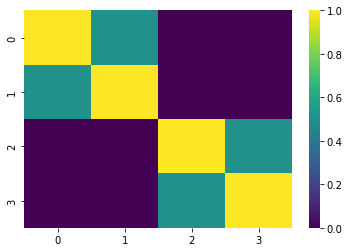

In [4]:
corr0 = formBlockMatrix(2, 2, .5)
eigenValues, eigenVectors = np.linalg.eigh(corr0)
print(max(eigenValues)/min(eigenValues))
sns.heatmap(corr0, cmap = "viridis")

# Snippet 7.2

In [5]:
corr0 = block_diag(formBlockMatrix(1, 2, .5))
corr1 = formBlockMatrix(1, 2, .0)
corr0 = block_diag(corr0, corr1)
eigenValues, eigenVectors = np.linalg.eigh(corr0)
print(max(eigenValues)/min(eigenValues))

3.0


# Snippet 7.3

In [4]:
allStocks = pd.DataFrame()
stocks = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA", "FB", "JPM", "UNH",
"V", "JNJ", "HD", "WMT", "PG", "BAC", "MA", "PFE", "DIS", "AVGO",
"XOM", "ACM", "CSCO", "NFLX", "NKE", "LLY", "KO", "TMO", "CRM", "COST", "AAL", "TWTR"]
for symb in stocks:
    data = pd.DataFrame(yf.Ticker(symb).history(start = "2019-01-01", end = "2021-08-08")['Close']).transpose()
    # data.save_batch_run(symb + '.csv')
    if symb == 'BTC-USD':
      allStocks = data.copy()
    else:
      allStocks=allStocks.append(data)
allStocks.index = [stocks]
allStocks = allStocks.transpose()
allStocks = allStocks.pct_change(1)

In [5]:
cov0 = allStocks.cov()
cols = cov0.columns
cov1 = deNoiseCov(cov0, allStocks.shape[0]/allStocks.shape[1], bandWidth = .01) # de-noise cov
cov1 = pd.DataFrame(cov1, index = cols, columns = cols)
corr1 = covToCorr(cov1)
corr1, clusters, silh = clusterKMeansBase(corr1, numberClusters = int(corr1.shape[0]/2), iterations=10)

c:\Users\RR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\Users\RR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\Users\RR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\Users\RR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\Users\RR\anaconda3\li

# Snippet 7.4

In [6]:
wIntra = pd.DataFrame(0, index = cov1.index, columns = clusters.keys())
for i in clusters:
    wIntra.loc[clusters[i], i] = optPort(cov1.loc[clusters[i], clusters[i]]).flatten()
wIntra

,0,1,2,3
AAPL,0.000000,0.000409,0.000000,0.000000
MSFT,0.000000,0.145393,0.000000,0.000000
GOOG,0.000000,0.228984,0.000000,0.000000
AMZN,0.595474,0.000000,0.000000,0.000000
TSLA,-0.088138,0.000000,0.000000,0.000000
FB,0.227319,0.000000,0.000000,0.000000
JPM,0.000000,0.000000,0.050252,0.000000
UNH,0.000000,0.063418,0.000000,0.000000
V,0.000000,0.178394,0.000000,0.000000
JNJ,0.000000,0.000000,0.000000,0.278894


In [7]:
cov2 = wIntra.T.dot(np.dot(cov1, wIntra)) # reduced covariance matrix
cov2

,0,1,2,3
0,0.000312,0.000185,0.000103,0.000115
1,0.000185,0.000247,0.000168,0.000133
2,0.000103,0.000168,0.000230,0.000109
3,0.000115,0.000133,0.000109,0.000135


# Snippet 7.5

In [8]:
wInter = pd.Series(optPort(cov2).flatten(), index = cov2.index)
wInter

0    0.144750
1   -0.208654
2    0.248205
3    0.815699
dtype: float64

In [9]:
wAll0 = wIntra.mul(wInter, axis = 1).sum(axis = 1).sort_index()
wAll0

AAL    -0.016694
AAPL   -0.000085
ACM     0.013283
AMZN    0.086195
AVGO    0.018792
BAC    -0.014176
COST    0.264049
CRM     0.021887
CSCO   -0.035151
DIS     0.038744
FB      0.032904
GOOG   -0.047778
HD     -0.037387
JNJ     0.227494
JPM     0.012473
KO      0.192354
LLY    -0.074535
MA      0.008893
MSFT   -0.030337
NFLX    0.017600
NKE    -0.035145
PFE     0.076783
PG      0.129479
TMO    -0.019434
TSLA   -0.012758
TWTR   -0.001078
UNH    -0.013232
V      -0.037222
WMT     0.211863
XOM     0.022222
dtype: float64

# Snippet 7.6

In [10]:
optPortNCO(cov1)

c:\Users\RR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\Users\RR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\Users\RR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\Users\RR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\Users\RR\anaconda3\li

array([[ 0.00200281],
       [ 0.00979585],
       [ 0.01486773],
       [ 0.01644607],
       [-0.00400106],
       [ 0.00261517],
       [-0.00101311],
       [ 0.00060704],
       [ 0.01987128],
       [ 0.22555922],
       [ 0.02155283],
       [ 0.2100613 ],
       [ 0.12837768],
       [-0.01443159],
       [-0.00619923],
       [ 0.07613004],
       [ 0.01071036],
       [ 0.00200769],
       [ 0.00773323],
       [-0.00136434],
       [ 0.01500087],
       [ 0.00242279],
       [ 0.01895456],
       [-0.07390152],
       [ 0.08365233],
       [-0.01926824],
       [ 0.00031909],
       [ 0.26180334],
       [-0.00723245],
       [-0.00307974]])

# Snippet 7.7

In [15]:
nBlocks,bSize,bCorr = 10, 50, .5
np.random.seed(0)
mu0, cov0 = formTrueMatrix(nBlocks, bSize, bCorr)

# Snippet 7.8 - minimumVariance

In [16]:
nObs, nSims, shrink, minVarPortf = 1000, 10, False, True
w1 = pd.DataFrame(columns = range(cov0.shape[0]), index = range(nSims), dtype = float)
w1_d = w1.copy(deep = True)
np.random.seed(0)
for i in range(nSims):
    mu1, cov1 = simCovMu(mu0, cov0, nObs, shrink = shrink)
    if minVarPortf:mu1 = None
    w1.loc[i] = optPort(cov1, mu1).flatten()
    w1_d.loc[i] = optPortNCO(cov1, mu1, int(cov1.shape[0]/2)).flatten()

c:\Users\RR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\Users\RR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\Users\RR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\Users\RR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\Users\RR\anaconda3\li

# Snippet 7.9 - minimumVariance

In [17]:
w0 = optPort(cov0, None if minVarPortf else mu0)
w0 = np.repeat(w0.T, w1.shape[0], axis = 0)
rmsd = np.mean((w1 - w0).values.flatten()**2)**.5 # RMSE
rmsd_d = np.mean((w1_d - w0).values.flatten()**2)**.5 # RMSE
print (rmsd, rmsd_d)

0.007826781480913493 0.004160983087900348


# Snippet 7.8 - Maximum Sharpe Ratio

In [18]:
nObs, nSims, shrink, minVarPortf = 1000, 10, False, False
w1 = pd.DataFrame(columns = range(cov0.shape[0]), index = range(nSims), dtype = float)
w1_d = w1.copy(deep = True)
np.random.seed(0)
for i in range(nSims):
    mu1, cov1 = simCovMu(mu0, cov0, nObs, shrink = shrink)
    if minVarPortf:mu1 = None
    w1.loc[i] = optPort(cov1, mu1).flatten()
    w1_d.loc[i] = optPortNCO(cov1, mu1, int(cov1.shape[0]/2)).flatten()

c:\Users\RR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\Users\RR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\Users\RR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\Users\RR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\Users\RR\anaconda3\li

# Snippet 7.9 - Maximum Sharpe Ratio

In [19]:
w0 = optPort(cov0, None if minVarPortf else mu0)
w0 = np.repeat(w0.T, w1.shape[0], axis = 0)
rmsd = np.mean((w1 - w0).values.flatten()**2)**.5 # RMSE
rmsd_d = np.mean((w1_d - w0).values.flatten()**2)**.5 # RMSE
print (rmsd, rmsd_d)

0.19015105422881604 0.027511465030684735
